# <center>CHALLENGE 3<center>

<p>Team Name: Parasyte
<p>Student Names: Abby Ortego, Catherine Nixon
<p>Student W#s: W0716476, W0704280

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [2]:
data = pd.DataFrame(pd.read_csv('INPUT/titanic.csv'))
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [3]:
pasUpto19 = pd.DataFrame(columns = ['AGE_12','AGE_TEEN','PCLASS'])

#load data from original dataframe by Age
pasUpto19['AGE_12'] = data.loc[data["Age"] < 20, "Age"]
pasUpto19['AGE_TEEN'] = data.loc[data["Age"] < 20, "Age"]
pasUpto19['PCLASS'] = data.loc[data["Age"] < 20, "Pclass"]

#reset indices
pasUpto19 = pasUpto19.reset_index(drop = True)

#'null' values that do not belong in their columns
pasUpto19['AGE_12'] = pasUpto19['AGE_12'].where(pasUpto19['AGE_12'] <= 12)
pasUpto19['AGE_TEEN'] = pasUpto19['AGE_TEEN'].where(pasUpto19['AGE_TEEN'] >= 13)

#print
display(pasUpto19)

,AGE_12,AGE_TEEN,PCLASS
0,2.0,NaN,3
1,NaN,14.0,2
2,4.0,NaN,3
3,NaN,14.0,3
4,2.0,NaN,3
...,...,...,...
159,NaN,18.0,3
160,4.0,NaN,3
161,NaN,15.0,3
162,NaN,19.0,3


Display 5 rows below and above the middle row of "pasUpto19":

In [4]:
#store index of middle row
mid_pasUpto19 = int(len(pasUpto19.index) / 2) #row 82

#display five above (-5) to five below (+6)
display(pasUpto19.iloc[mid_pasUpto19-5:mid_pasUpto19+6])

,AGE_12,AGE_TEEN,PCLASS
77,1.0,NaN,3
78,NaN,17.0,2
79,3.0,NaN,2
80,NaN,18.0,2
81,10.0,NaN,3
82,NaN,18.0,3
83,NaN,19.0,2
84,NaN,17.0,3
85,NaN,14.0,1
86,4.0,NaN,1


Group pasUpto19 by AGE_TEEN:

In [5]:
pasUpto19.groupby("AGE_TEEN")

Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [6]:
display(pasUpto19.groupby("AGE_TEEN").mean("PCLASS"))

,AGE_12,PCLASS
AGE_TEEN,,
13.0,NaN,2.500000
14.0,NaN,2.500000
14.5,NaN,3.000000
15.0,NaN,2.600000
16.0,NaN,2.529412
17.0,NaN,2.384615
18.0,NaN,2.461538
19.0,NaN,2.360000


Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [7]:
pasUpto19_sortTeen = pasUpto19.sort_values(by = ['AGE_TEEN'])
display(pasUpto19_sortTeen)

,AGE_12,AGE_TEEN,PCLASS
138,NaN,13.0,3
87,NaN,13.0,2
118,NaN,14.0,3
117,NaN,14.0,3
85,NaN,14.0,1
...,...,...,...
150,1.00,NaN,2
152,0.83,NaN,2
156,4.00,NaN,3
157,9.00,NaN,3


## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [8]:
pasUpto19_stat = pasUpto19.describe()
display(pasUpto19_stat)

,AGE_12,AGE_TEEN,PCLASS
count,69.00000,95.000000,164.000000
mean,4.77058,17.215789,2.530488
std,3.39039,1.633513,0.712929
min,0.42000,13.000000,1.000000
25%,2.00000,16.000000,2.000000
50%,4.00000,18.000000,3.000000
75%,8.00000,19.000000,3.000000
max,12.00000,19.000000,3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [9]:
pasUpto19_stat_lst = pasUpto19_stat.values.tolist()
display(pasUpto19_stat_lst)

[[69.0, 95.0, 164.0],
 [4.770579710144927, 17.21578947368421, 2.5304878048780486],
 [3.3903903488857394, 1.6335131041990902, 0.7129286396611784],
 [0.42, 13.0, 1.0],
 [2.0, 16.0, 2.0],
 [4.0, 18.0, 3.0],
 [8.0, 19.0, 3.0],
 [12.0, 19.0, 3.0]]

Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [10]:
#store mean of AGE_12 & AGE_TEEN
AGE_12_mean = pasUpto19_stat.loc['mean','AGE_12']
AGE_TEEN_mean = pasUpto19_stat.loc['mean','AGE_TEEN']

#display rows >= AGE_12_mean or rows >= AGE_TEEN_mean
display(pasUpto19.loc[(pasUpto19['AGE_12'] >= AGE_12_mean) | (pasUpto19['AGE_TEEN'] >= AGE_TEEN_mean)])

,AGE_12,AGE_TEEN,PCLASS
6,8.0,NaN,3
7,NaN,19.0,1
8,NaN,18.0,3
11,NaN,19.0,3
12,NaN,18.0,3
...,...,...,...
153,NaN,18.0,3
157,9.0,NaN,3
159,NaN,18.0,3
162,NaN,19.0,3


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
dic = {"x": pd.Series([2,-1,3,5], name="x"),
      "y": pd.Series((10,11,12), name="y")
      }<br>
df = pd.DataFrame(dic)<br>
print(df)<br>
df.eval("x == 5")
</p>

Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [11]:
#make a 'mask' that indicates where conditions are met (T/F)
mask = data.eval('((Age >= 3) & (Age < 7)) | ((Age >= 12) & (Age <= 15))') #original dataframe to display passenger names

#query dataframe using mask variable (@) as a filter
pas3to6_12to15 = data.query("@mask == True")
display(pas3to6_12to15.loc[:,['Name', 'Age']]) #display name and age of passengers that met conditions

,Name,Age
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0
10,"Sandstrom, Miss. Marguerite Rut",4.0
14,"Vestrom, Miss. Hulda Amanda Adolfina",14.0
22,"McGowan, Miss. Anna ""Annie""",15.0
39,"Nicola-Yarred, Miss. Jamila",14.0
43,"Laroche, Miss. Simonne Marie Anne Andree",3.0
58,"West, Miss. Constance Mirium",5.0
63,"Skoog, Master. Harald",4.0
111,"Zabour, Miss. Hileni",14.5
125,"Nicola-Yarred, Master. Elias",12.0


## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

Text(0.5, 0.98, 'Plots for Pclass and Age')

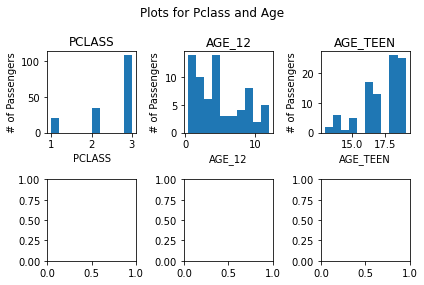

In [12]:
#subplots figure with two rows and three columns
fig, ax = plt.subplots(2,3, tight_layout = True)

#PCLASS Histogram
ax[0][0].hist(pasUpto19.PCLASS)
ax[0][0].set(xlabel = 'PCLASS', ylabel = '# of Passengers')
ax[0][0].title.set_text('PCLASS')

#AGE_12 Histogram
ax[0][1].hist(pasUpto19.AGE_12)
ax[0][1].set(xlabel = 'AGE_12',  ylabel = '# of Passengers')
ax[0][1].title.set_text('AGE_12')

#AGE_TEEN Histogram
ax[0][2].hist(pasUpto19.AGE_TEEN)
ax[0][2].set(xlabel = 'AGE_TEEN',  ylabel = '# of Passengers')
ax[0][2].title.set_text('AGE_TEEN')

#Title Figure
fig.suptitle("Plots for Pclass and Age")

Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:

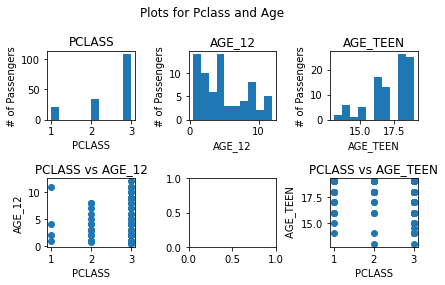

In [13]:
#PCLASS vs AGE_12 Scatter Plot
ax[1][0].scatter( x = pasUpto19.PCLASS, y = pasUpto19.AGE_12)
ax[1][0].set(xlabel = 'PCLASS', ylabel = 'AGE_12')
ax[1][0].title.set_text('PCLASS vs AGE_12')

#PCLASS vs AGE_TEEN Scatter Plot
ax[1][2].scatter( x = pasUpto19.PCLASS, y = pasUpto19.AGE_TEEN)
ax[1][2].set(xlabel = 'PCLASS', ylabel = ' AGE_TEEN')
ax[1][2].title.set_text('PCLASS vs AGE_TEEN')

display(fig)

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://www.projectpro.io/recipes/search-value-within-pandas-dataframe-column
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
https://www.statology.org/pandas-loc-multiple-conditions/
https://www.activestate.com/resources/quick-reads/how-to-display-a-plot-in-python/
https://towardsdatascience.com/get-more-efficient-in-your-data-analysis-with-pandas-query-and-eval-methods-3646317e591f
https://www.geeksforgeeks.org/how-to-add-title-to-subplots-in-matplotlib/#:~:text=If%20you%20use%20Matlab%2Dlike,to%20the%20subplots%20in%20Matplotlib.